In [1]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [2]:
# Load image in grayscale format
road = cv2.imread('Images/Road.png', cv2.IMREAD_GRAYSCALE)
building = cv2.imread('Images/Building.png', cv2.IMREAD_GRAYSCALE)

road_color = cv2.imread('Images/Road.png', cv2.IMREAD_COLOR)
building = cv2.imread('Images/Building.png', cv2.IMREAD_COLOR)

In [ ]:
# Show images
cv2.imshow('Color road displayed in grayscale', road)
cv2.imshow('Color building displayed in grayscale', building)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [86]:
# rescaling road

basewidth = 100
road_img = Image.open('Images/Road.png')
wpercent = (basewidth/float(road_img.size[0]))
hsize = int((float(road_img.size[1])*float(wpercent)))
resc_road = road_img.resize((basewidth,hsize), Image.ANTIALIAS)
resc_road.save('rescale_road.png', quality = 95)


In [87]:
# Canny

#img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread( 'Images/rescale_road.png', cv2.IMREAD_GRAYSCALE)

def update( lo_thresh=80, hi_thresh=180, sobel_size=3):
    img_canny = cv2.Canny( img, lo_thresh, hi_thresh, apertureSize=sobel_size, L2gradient=True)

    tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))

interact(update, lo_thresh = (10, 150, 10), hi_thresh = (120, 240, 10), sobel_size= [3, 5, 7])

# best = lo_thresh = 90, hi_tresh = 150 , sobel size = 3

interactive(children=(IntSlider(value=80, description='lo_thresh', max=150, min=10, step=10), IntSlider(value=…

<function __main__.update(lo_thresh=80, hi_thresh=180, sobel_size=3)>

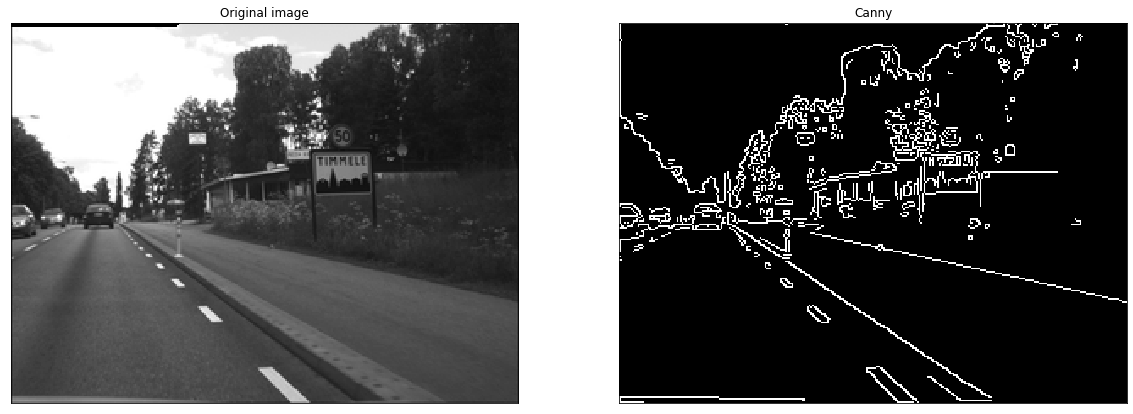

In [89]:
minLineLength = 1
maxLineGap = 20
sobel_size = 3
img = cv2.imread( 'Images/rescale_road.png', cv2.IMREAD_GRAYSCALE)
img_canny = cv2.Canny(img, 90, 150 , apertureSize=sobel_size, L2gradient=True)
lines = cv2.HoughLinesP(img_canny,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

cv2.imwrite('houghlines5.png',img)

tools.multiPlot( 1, 2, ( img, img_canny),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))


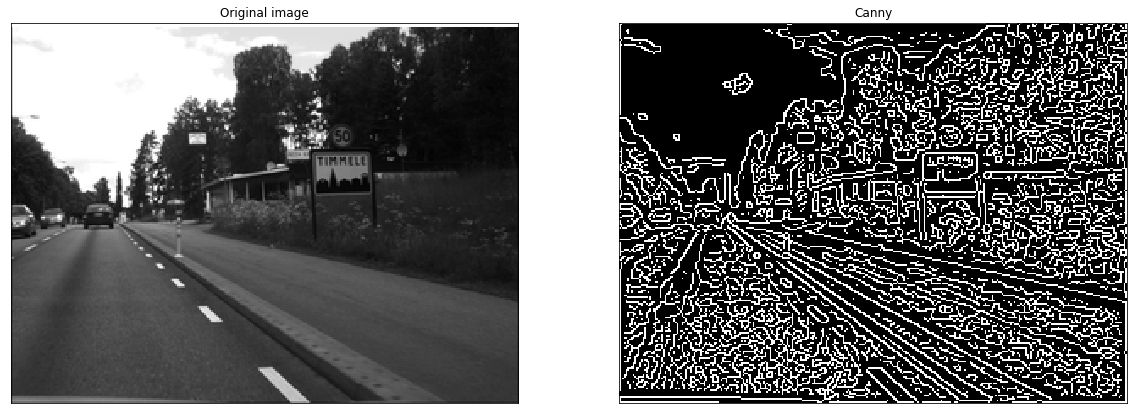

In [95]:
img = cv2.imread( 'Images/rescale_road.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 90, 150 , apertureSize=7, L2gradient=True)

lines = cv2.HoughLines(edges,1,np.pi/180,2)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),3)

cv2.imwrite('houghlines3.jpg',img)

tools.multiPlot( 1, 2, ( img, edges),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))